In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('C:\\Users\\nicol\\Desktop\\INF2178_A4\\INF2178_A4_data.csv')

In [3]:
print(data.head())

   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   

  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883  
1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876  
2    R   75    12  NaN  23.0  0.5  1678  0.736  1.046  
3    R   76    12  NaN  28.0  0.5  1738  0.713  1.010  
4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444  


In [5]:
# Check no missing values in the key variables for the mixed-effects model
df = df.dropna(subset=['nWBV', 'MR Delay', 'Subject ID'])

In [6]:
# Convert 'Visit' to a categorical variable
df['Visit'] = df['Visit'].astype(str)

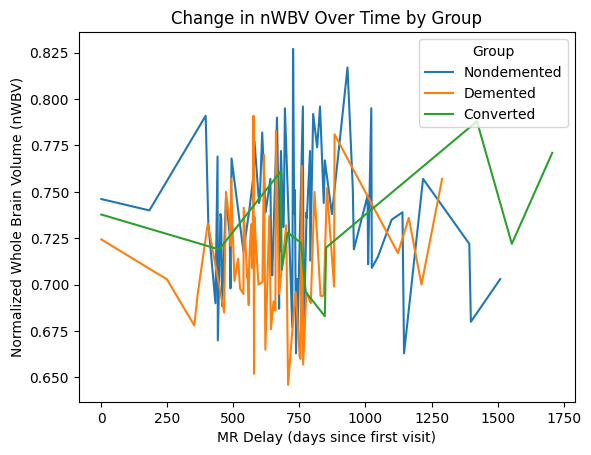

In [8]:
# Plot how nWBV changes between the two groups
sns.lineplot(x='MR Delay', y='nWBV', hue='Group', data=df, errorbar=None)
plt.title('Change in nWBV Over Time by Group')
plt.xlabel('MR Delay (days since first visit)')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Group')
plt.show()

In [13]:
# Mixed-effects model
# 'nWBV' as the dependent variable, 'MR Delay' as the fixed effect
model = mixedlm("nWBV ~ Q('MR Delay')", df, groups=df["Subject ID"])
result = model.fit()

# Print the summary of the mixed model
print(result.summary())

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  nWBV    
No. Observations:  294      Method:              REML    
No. Groups:        150      Scale:               0.0001  
Min. group size:   1        Log-Likelihood:      706.8612
Max. group size:   2        Converged:           Yes     
Mean group size:   2.0                                   
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      0.736    0.003 242.332 0.000  0.730  0.742
Q('MR Delay') -0.000    0.000 -10.587 0.000 -0.000 -0.000
Group Var      0.001    0.028                            



C:\Users\nicol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import mixedlm

# Load the dataset
df = pd.read_csv('C:\\Users\\nicol\\Desktop\\INF2178_A4\\INF2178_A4_data.csv')

# Clean the 'CDR' column
df['CDR'] = pd.to_numeric(df['CDR'], errors='coerce')
# Remove rows with missing 'CDR' values
df.dropna(subset=['CDR'], inplace=True)

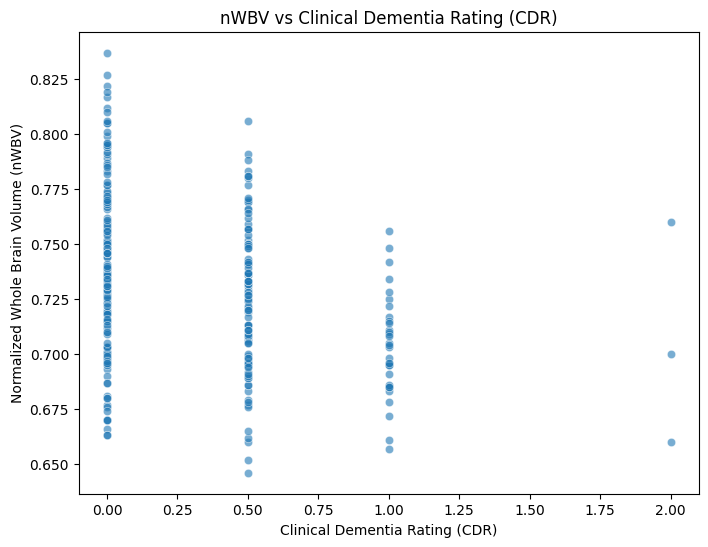

In [15]:
# Scatter plot for nWBV vs CDR
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CDR', y='nWBV', alpha=0.6)
plt.title('nWBV vs Clinical Dementia Rating (CDR)')
plt.xlabel('Clinical Dementia Rating (CDR)')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.savefig('nWBV_vs_CDR_scatterplot.png')
plt.show()

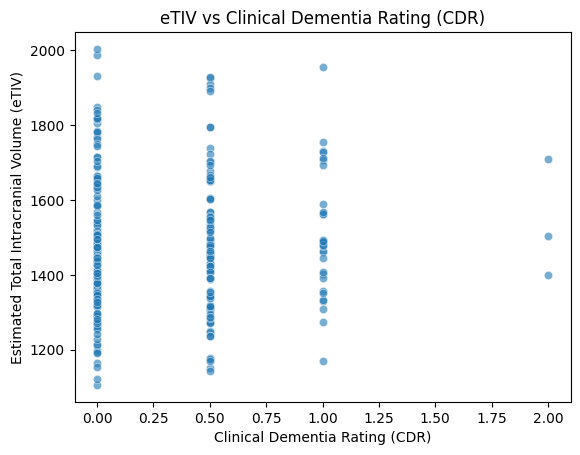

In [16]:
# Scatter plot for eTIV vs CDR
sns.scatterplot(data=df, x='CDR', y='eTIV', alpha=0.6)
plt.title('eTIV vs Clinical Dementia Rating (CDR)')
plt.xlabel('Clinical Dementia Rating (CDR)')
plt.ylabel('Estimated Total Intracranial Volume (eTIV)')
plt.savefig('eTIV_vs_CDR_scatterplot.png')
plt.show()

In [17]:
# For the mixed-effects model ,make nWBV and eTIV as fixed effects and 'Subject ID' as a random effect
model = mixedlm("CDR ~ nWBV + eTIV", df, groups=df['Subject ID'])
result = model.fit()

# Print the summary of the model
print(result.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: CDR     
No. Observations: 294     Method:             REML    
No. Groups:       150     Scale:              0.0274  
Min. group size:  1       Log-Likelihood:     -56.2792
Max. group size:  2       Converged:          Yes     
Mean group size:  2.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    3.191    0.601  5.306 0.000  2.012  4.369
nWBV        -3.837    0.683 -5.614 0.000 -5.177 -2.498
eTIV        -0.000    0.000 -0.362 0.718 -0.000  0.000
Group Var    0.104    0.118                           



In [18]:
pip install statsmodels

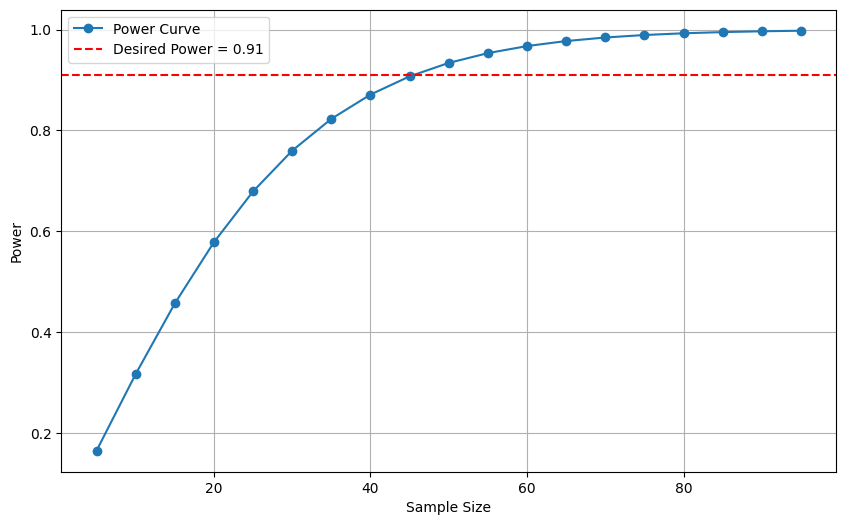

Sample size needed: 45.45073088568017


<Figure size 640x480 with 0 Axes>

In [22]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import numpy as np

# Parameters for power analysis
effect_size = 0.7  # Presumed effect size
alpha = 0.05       # Alpha level
power = 0.91       # Desired power

# Create an instance of TTestIndPower
analysis = TTestIndPower()

# Generate a range of sample sizes
sample_sizes = np.arange(5, 100, 5)

# Calculate power for each sample size
powers = [analysis.solve_power(effect_size=effect_size, nobs1=s, alpha=alpha, power=None) for s in sample_sizes]

# Plotting the power analysis results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, 'o-', label='Power Curve')
plt.axhline(y=power, color='red', linestyle='--', label=f'Desired Power = {power}')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the sample size
sample_size_needed = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, nobs1=None)
print(f'Sample size needed: {sample_size_needed}')
